In [2]:
# Importamos la librería 'numpy' con alias 'np'
import numpy as np

# Importamos la librería 'pandas' con alias 'pd'
import pandas as pd

# Importamos la librería 'matplotlib.pyplot' con alias 'plt'
import matplotlib.pyplot as plt

# Importamos la librería 'seaborn' con alias 'sns'
import seaborn as sns

# Importamos la librería 'datetime' con alias 'dt'
import datetime as dt

In [3]:
# Leemos el archivo 'ecommerce_transactions.csv' y lo cargamos en un DataFrame con el nombre 'transacciones'
transacciones = pd.read_csv(r'C:\Users\pcstu\OneDrive\Documentos\MIA\Fundamentos\ecommerce_transactions.csv')

# Mostramos las primeras 5 filas del DataFrame 'transacciones' usando el método 'head()'
transacciones.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [4]:
from ydata_profiling import ProfileReport


In [5]:
profile=ProfileReport(transacciones, title='Reporte perfilamiento de Datos', explorative=True)


In [14]:
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


In [6]:
transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [7]:

transacciones.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [8]:
transacciones = transacciones.dropna()

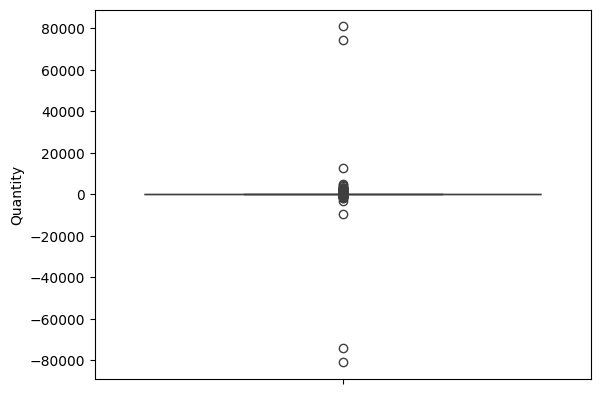

In [9]:
# Usamos el método 'boxplot()' de la librería seaborn 'sns'
# Visualizamos la distribución de la variable 'Quantity' del DataFrame 'transacciones'
sns.boxplot(y=transacciones['Quantity'])
plt.show()

In [10]:
# Calculamos el primer cuartil (Q1) de la variable 'Quantity' del DataFrame 'transacciones'
# Usamos el método 'quantile()' y el parámetro '0.25' 
Q1 = transacciones['Quantity'].quantile(0.25)

# Calculamos el tercer cuartil (Q3) de la variable 'Quantity' del DataFrame 'transacciones'
# Usamos el método 'quantile()' y el parámetro '0.75'
Q3 = transacciones['Quantity'].quantile(0.75)

# Calculamos el rango intercuartil (IQR) de la variable 'Quantity' 
# restando el tercer cuartil (Q3) menos el primer cuartil (Q1)
IQR = Q3 - Q1
IQR

np.float64(9.0)

In [11]:
# Definimos el límite inferior usando la fórmula Q1 - 1.5 * IQR
# Q1 es el primer cuartil, IQR es el rango intercuartil y 1.5 es un factor de escala
limite_inferior = Q1 - 1.5 * IQR

# Definimos el límite superior usando la fórmula Q3 + 1.5 * IQR 
# Q3 es el tercer cuartil, IQR es el rango intercuartil y 1.5 es un factor de escala
limite_superior = Q3 + 1.5 * IQR

# Filtramos los valores atípicos de la variable 'Quantity' del DataFrame 'transacciones' 
# Los outliers son aquellas observaciones que están por debajo del límite inferior o por encima del límite superior
# Usamos el operador lógico '|' para indicar 'o' en la condición
outliers = (transacciones['Quantity'] < limite_inferior) | (transacciones['Quantity'] > limite_superior)

# Eliminamos los valores atípicos de la variable 'Quantity' del DataFrame 'transacciones'
# Usamos el operador '~' para negar la condición y obtener los valores que no son atípicos
transacciones = transacciones[~outliers]

<Axes: ylabel='Quantity'>

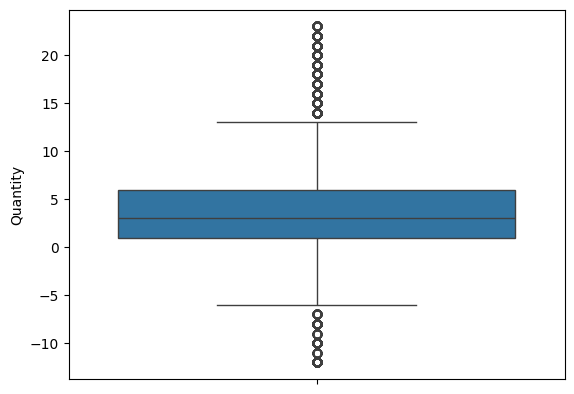

In [12]:
# Revisamos nuevamente los valores atípicos (outliers) en la columna 'Quantity'
# Usamos el método 'boxplot()' de la librería 'seaborn' con la variable 'Quantity
sns.boxplot(y=transacciones['Quantity'])

<Axes: ylabel='Quantity'>

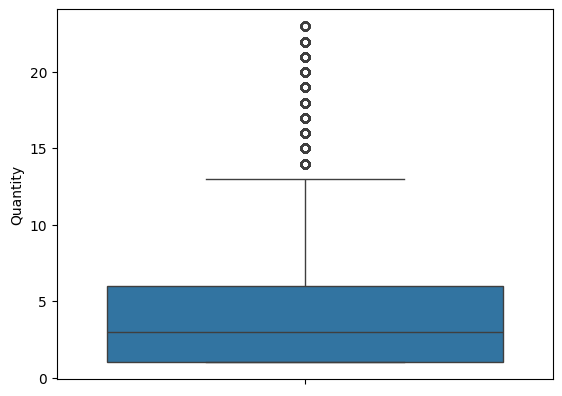

In [13]:
# Eliminamos los valores negativos de la columna 'Quantity' del DataFrame 'transacciones'
# Usamos el operador '>' para seleccionar los valores mayores a cero (0) en la columna 'Quantity'
transacciones = transacciones[transacciones['Quantity'] > 0]

# Revisamos nuevamente los valores atípicos (outliers) en la columna 'Quantity'
# Usamos el método 'boxplot()' de la librería 'seaborn' con la variable 'Quantity' en el eje y
sns.boxplot(y=transacciones['Quantity'])

### **Fase III:** Productos que más se venden y que mayor ganancia (revenue) generan

In [15]:
# Usamos el operador '*' para multiplicar las columnas 'Price' y 'Quantity' del DataFrame 'transacciones'
# Asignamos el resultado de la multiplicación a la columna 'Revenue' del DataFrame 'transacciones'
transacciones['Revenue'] = transacciones['Price'] * transacciones['Quantity']

# Mostramos las primeras 5 filas del DataFrame 'transacciones' con el método 'head()'
transacciones.head()
# Mostramos las primeras 5 filas del DataFrame 'transacciones' con el método 'head()'
transacciones.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom,207.54


In [16]:
# Agrupamos el DataFrame 'transacciones' por la columna 'ProductName'
# Usamos el método 'groupby()' y pasamos la columna 'ProductName' como argumento
productos_agrupados = transacciones.groupby('ProductName')

# Sumamos la columna 'Quantity' de cada grupo
# Usamos el método 'sum()' para sumar la columna 'Quantity' de cada grupo
suma_cantidades_por_producto = productos_agrupados['Quantity'].sum()

# Ordenamos los resultados de forma descendente
# Usamos el método 'sort_values()' con el argumento 'ascending=False'
# Guardamos el resultado en la variable 'productos_mas_vendidos'
productos_mas_vendidos = suma_cantidades_por_producto.sort_values(ascending=False)

# Mostramos los 10 productos que más se han vendido con el método 'head()'
productos_mas_vendidos.head(10)

ProductName
Jumbo Bag Red Retrospot               14050
Assorted Colour Bird Ornament         11062
Cream Hanging Heart T-Light Holder    10960
Lunch Bag Red Retrospot               10541
Jumbo Bag Vintage Doily                9306
Lunch Bag Vintage Doily                8405
Regency Cakestand 3 Tier               8328
Lunch Bag Suki Design                  8268
Lunch Bag Black Skull                  8218
Lunch Bag Cars Blue                    7928
Name: Quantity, dtype: int64

Visualizamos los 10 productos que más se han vendido

C:\Users\pcstu\AppData\Local\Temp\ipykernel_10828\3427148326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_mas_vendidos.head(10), y=productos_mas_vendidos.head(10).index, palette='viridis')


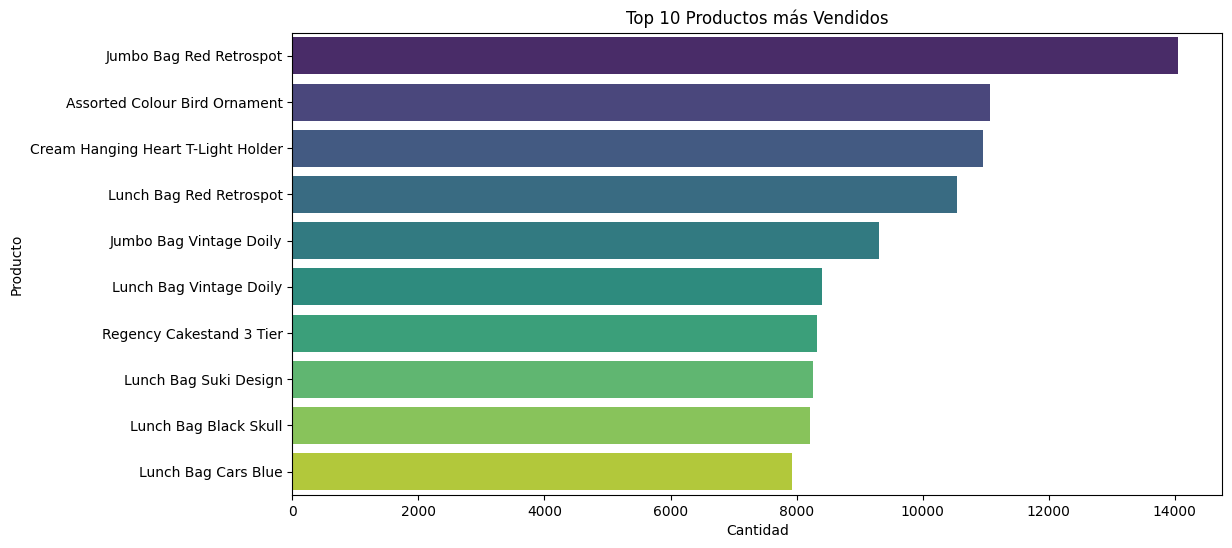

In [17]:
# Creamos una figura con el método 'figure()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el tamaño de la figura con el parámetro 'figsize' y las dimensiones (12, 6)
plt.figure(figsize=(12, 6))

# Usamos el método 'barplot()' de la librería seaborn 'sns' para mostrar solo los 10 productos más vendidos
# Definimos el eje x con los valores de la columna 'Quantity' de los 'productos_mas_vendidos'
# Definimos el eje y con los valores de los índices de los 'productos_mas_vendidos'
# Definimos la paleta de colores con el parámetro 'palette' y el valor 'viridis'
sns.barplot(x=productos_mas_vendidos.head(10), y=productos_mas_vendidos.head(10).index, palette='viridis')

# Definimos el título de la gráfica con el método 'title()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título 'Top 10 Productos más Vendidos'
plt.title('Top 10 Productos más Vendidos')

# Definimos la etiqueta del eje x con el método 'xlabel()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título de la etiqueta del eje x como 'Cantidad'
plt.xlabel('Cantidad')


# Definimos la etiqueta del eje y con el método 'ylabel()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título de la etiqueta del eje y como 'Producto'
plt.ylabel('Producto')

# Mostramos la gráfica con el método 'show()' de la librería matplotlib.pyplot con alias 'plt'
plt.show()

Revisamos los 10 productos que más ingresos han generado

In [18]:
# Agrupamos el DataFrame 'transacciones' por la columna 'ProductName' con el método 'groupby()'
productos_agrupados = transacciones.groupby('ProductName')

# Sumamos los ingresos (Revenue) por cada producto usando el método 'sum()'
suma_ingresos_por_producto = productos_agrupados['Revenue'].sum()

# Ordenamos los resultados de forma descendente
# Usamos el método 'sort_values()' con el argumento 'ascending=False'
# Guardamos el resultado en la variable 'productos_mas_ingresos'
productos_mas_ingresos = suma_ingresos_por_producto.sort_values(ascending=False)

# Mostramos los 10 productos que más ingresos han generado con el método 'head()'
productos_mas_ingresos.head(10)

ProductName
Regency Cakestand 3 Tier              188831.32
Cream Hanging Heart T-Light Holder    143410.29
Assorted Colour Bird Ornament         129096.00
Party Bunting                         122645.19
Jumbo Bag Red Retrospot                88625.81
Jam Making Set Printed                 88106.25
Jumbo Shopper Vintage Red Paisley      87483.07
Jumbo Storage Bag Suki                 87134.08
Popcorn Holder                         85207.51
Natural Slate Heart Chalkboard         81275.77
Name: Revenue, dtype: float64

Visualizamos los productos que más ingresos han generado

In [ ]:
# Creamos una figura con el método 'figure()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el tamaño de la figura con el parámetro 'figsize' y las dimensiones (12, 6)
plt.figure(figsize=(12, 6))

# Usamos el método 'barplot()' de la librería seaborn 'sns' 
# Visualizamos solo los 10 productos que más ingresos han generado 
# Definimos el eje x con los valores de la columna 'Revenue' que correspondan a los 'productos_mas_ingresos'
# Definimos el eje y con los valores de los índices de los 10 'productos_mas_ingresos' 
sns.barplot(x=productos_mas_ingresos.head(10), y=productos_mas_ingresos.head(10).index, palette='viridis')

# Definimos el título de la gráfica con el método 'title()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título 'Top 10 Productos con más Ingresos'
plt.title('Top 10 Productos con más Ingresos')

# Definimos la etiqueta del eje x con el método 'xlabel()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título de la etiqueta del eje x como 'Ingresos'
plt.xlabel('Ingresos')

# Definimos la etiqueta del eje y con el método 'ylabel()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título de la etiqueta del eje y como 'Producto'
plt.ylabel('Producto')

# Mostramos la gráfica con el método 'show()' de la librería matplotlib.pyplot con alias 'plt'
plt.show()

Visualizamos la distribución de las ganancias por mes

C:\Users\pcstu\AppData\Local\Temp\ipykernel_10828\2837674241.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values, palette='viridis')


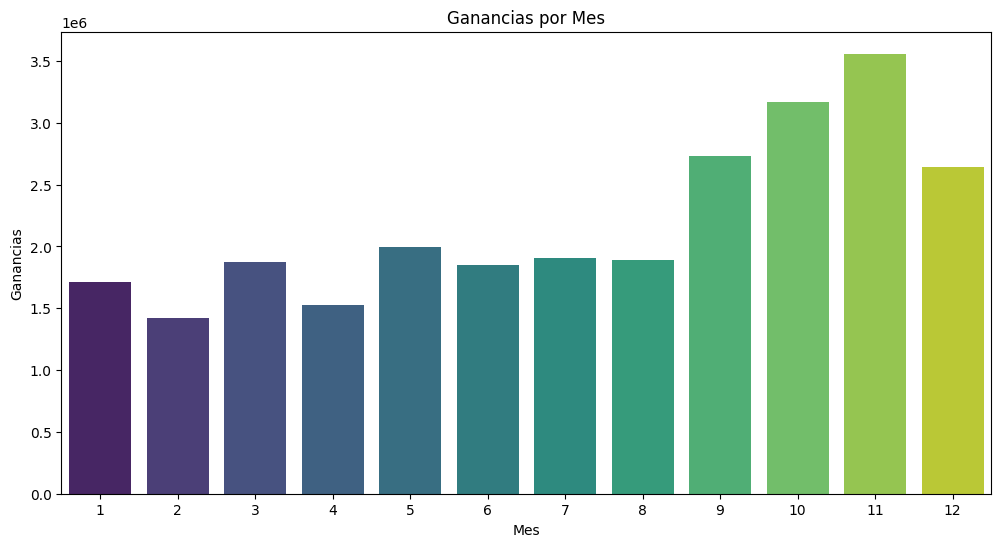

In [20]:
# Convertimos la columna 'Date' del DataFrame 'transacciones' a formato de fecha con el método 'to_datetime()'
# Usamos el formato '%m/%d/%Y' para indicar el mes, día, y año
# Guardamos el resultado en la columna 'Date' del DataFrame 'transacciones'
transacciones['Date'] = pd.to_datetime(transacciones['Date'], format='%m/%d/%Y')

# Creamos una nueva columna 'Month' en el DataFrame 'transacciones' con el mes de cada transacción
# Usamos el método 'dt.month' para obtener el mes de la columna 'Date'
transacciones['Month'] = transacciones['Date'].dt.month

# Agrupamos el DataFrame 'transacciones' por la columna 'Month' usando el método 'groupby()'
# Sumamos los ingresos (Revenue) por mes usando el método 'sum()'
# Guardamos los resultados en la variable 'ventas_por_mes'
ventas_por_mes = transacciones.groupby('Month')['Revenue'].sum()

# Creamos una figura con el método 'figure()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el tamaño de la figura con el parámetro 'figsize' y las dimensiones (12, 6)
plt.figure(figsize=(12, 6))

# Usamos el método 'barplot()' de la librería seaborn 'sns' para visualizar los datos en forma de barras
# Definimos el eje x con los valores de los índices de 'ventas_por_mes'
# Definimos el eje y con los valores de 'ventas_por_mes'
# Definimos la paleta de colores con el parámetro 'palette' y el valor 'viridis'
sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values, palette='viridis')

# Definimos el título de la gráfica con el método 'title()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título 'Ganancias por Mes'
plt.title('Ganancias por Mes')

# Definimos la etiqueta del eje x con el método 'xlabel()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título de la etiqueta del eje x como 'Mes'
plt.xlabel('Mes')

# Definimos la etiqueta del eje y con el método 'ylabel()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título de la etiqueta del eje y como 'Ganancias'
plt.ylabel('Ganancias')

# Mostramos la gráfica con el método 'show()' de la librería matplotlib.pyplot con alias 'plt'
plt.show()

Visualizamos la distribución de las ventas por día de la semana con un gráfico de barras

C:\Users\pcstu\AppData\Local\Temp\ipykernel_10828\1665986007.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_dia_semana.index, y=ventas_por_dia_semana.values, palette='viridis')


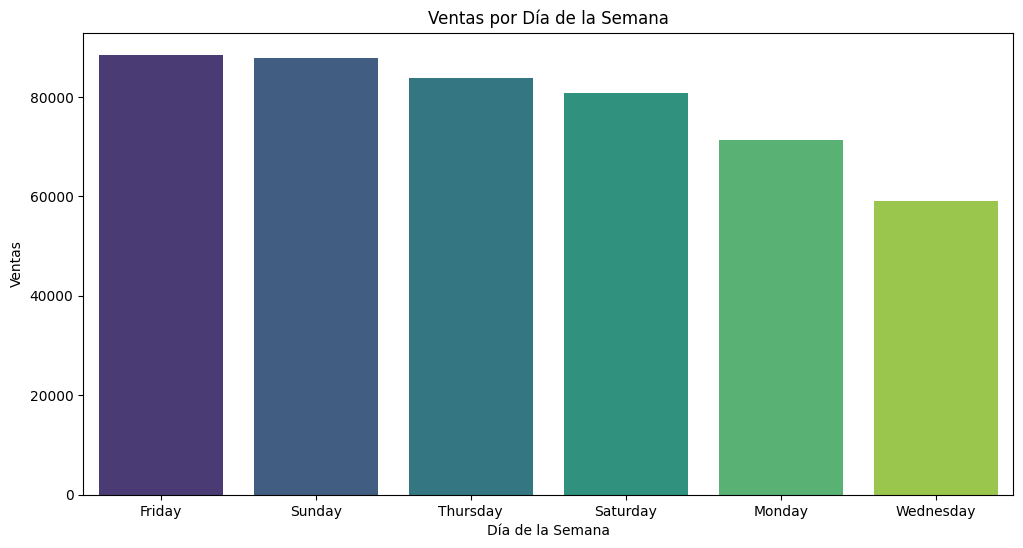

In [21]:
# Creamos una nueva columna 'DayOfWeek en el DataFrame 'transacciones' con el día de la semana de cada transacción
# Usamos el método 'dt.day_name()' para obtener el nombre del día de la columna 'Date'
transacciones['DayOfWeek'] = transacciones['Date'].dt.day_name()

# Contamos el número de ventas por día de la semana con el método 'value_counts()' de la columna 'DayOfWeek'
# Guardamos los resultados en la variable 'ventas_por_dia_semana'
ventas_por_dia_semana = transacciones['DayOfWeek'].value_counts()

# Creamos una figura con el método 'figure()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el tamaño de la figura con el parámetro 'figsize' y las dimensiones (12, 6)
plt.figure(figsize=(12, 6))

# Usamos el método 'barplot()' de la librería seaborn 'sns' para visualizar los datos en forma de barras
# Definimos el eje x con los valores de los índices de 'ventas_por_dia_semana'
# Definimos el eje y con los valores de 'ventas_por_dia_semana'
# Definimos la paleta de colores con el parámetro 'palette' y el valor 'viridis'
sns.barplot(x=ventas_por_dia_semana.index, y=ventas_por_dia_semana.values, palette='viridis')

# Definimos el título de la gráfica con el método 'title()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título 'Ventas por Día de la Semana'
plt.title('Ventas por Día de la Semana')

# Definimos la etiqueta del eje x con el método 'xlabel()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título de la etiqueta del eje x como 'Día de la Semana'
plt.xlabel('Día de la Semana')

# Definimos la etiqueta del eje y con el método 'ylabel()' de la librería matplotlib.pyplot con alias 'plt'
# Definimos el título de la etiqueta del eje y como 'Ventas'
plt.ylabel('Ventas')

# Mostramos la gráfica con el método 'show()' de la librería matplotlib.pyplot con alias 'plt'
plt.show()